# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание

[1  Исследование объявлений о продаже квартир](#Исследование-объявлений-о-продаже-квартир)

[1.1.1  Шаг 1. Откройте файл с данными и изучите общую информацию.](#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию.)

[1.1.2  Вывод](#Вывод)

[1.1.3  Шаг 2. Предобработка данных](#Шаг-2.-Предобработка-данных)

[1.1.4  Промежуточный вывод](#Промежуточный-вывод)

[1.1.5  Шаг 3. Посчитайте и добавьте в таблицу](#Шаг-3.-Посчитайте-и-добавьте-в-таблицу)

[1.1.6  Промежуточный вывод к 3 шагу](#Промежуточный-вывод-к-3-шагу)

[1.1.7  Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:](#Шаг-4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции:)

[1.1.8  Шаг 5. Общий вывод](#Шаг-5.-Общий-вывод)

[1.1.9  Чек-лист готовности проекта](#Чек-лист-готовности-проекта)

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# открываем файл
realty_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# выведем общую информацию о датасете
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
# выведем 5 случайных строк, для лучшего понимания датасета
realty_data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4227,14,4000000.0,44.0,2016-06-27T00:00:00,2,NaN,9.0,27.5,8,NaN,...,6.5,0.0,Санкт-Петербург,24526.0,12095.0,1.0,572.0,0.0,NaN,45.0
21392,14,5950000.0,64.0,2016-06-17T00:00:00,3,NaN,5.0,41.0,4,False,...,8.0,1.0,Пушкин,13454.0,25607.0,1.0,395.0,0.0,NaN,104.0
4653,18,6700000.0,68.0,2019-04-01T00:00:00,3,NaN,9.0,38.0,7,NaN,...,9.5,1.0,Санкт-Петербург,13792.0,16383.0,0.0,NaN,0.0,NaN,NaN
22738,20,4490000.0,43.0,2017-12-14T00:00:00,2,2.5,5.0,28.3,4,NaN,...,5.3,1.0,Санкт-Петербург,22594.0,5901.0,0.0,NaN,2.0,212.0,116.0
1447,18,6040000.0,59.4,2017-12-22T00:00:00,3,2.8,6.0,36.3,3,NaN,...,9.5,NaN,Санкт-Петербург,19420.0,3943.0,0.0,NaN,3.0,359.0,NaN


In [3]:
# выведем размер датасета и название колонок (все корректные, без пробелов и т. д.)
print('Размер датасета:', realty_data.shape)
print()
print('Названия столбцов:', realty_data.columns)

Размер датасета: (23699, 22)

Названия столбцов: Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [4]:
# применим метод describe для лучшего понимания числовых значений датасета
realty_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Открыл датасет, вижу что есть пропуски, причём во многих столбцах. Данные разных типов: 14 столбцов типа float, 3 столбца типа int, 3 столбца типа object и 2 столбца булевого типа.  С помочью метода sample получил общее представление о данных датасете, затем посмотрел размер датасета и общую числовую информацию о столбцах с помощью метода describe.

### Шаг 2. Предобработка данных

In [5]:
# посчитаем количество пропусков в столбцах
realty_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
realty_data['is_apartment'] = realty_data['is_apartment'].fillna(False)

realty_data['balcony'] = realty_data['balcony'].fillna(0)

Пропуски в _is_apartment_ заменим на _False_ (логическое отрицание), т. к. пропусков слишком много, и наверняка данные помещения НЕ являются апартаментами

Так же поступим с _balcony_, предположив что там где пропуски - балконы отсутствуют

Пропуски в _airports_nearest_ как правило у недвижимости, которая находится за городом, т. е. большое расстояние, тоже самое и у _cityCenters_nearest_, _parks_around3000_, _parks_nearest_, _ponds_around3000_,_ponds_nearest_ остальные ячейки не трогаем, т. к. нет однозначного алгоритма, по которому мы можем их заполнить

In [7]:
realty_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
realty_data['last_price'] =  realty_data['last_price'].astype('int')
realty_data['balcony'] = realty_data['balcony'].astype('int')

# переведём столбец first_day_exposition в формат даты и времени
realty_data['first_day_exposition'] = pd.to_datetime(realty_data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Переведём некоторые ячейки из вещественного в целочисленный тип:

_last_price_ - переведём в целочисленный тип, т. к. суммы большие и копейки не важны, т. е. можно округлить.

_balcony_ - переведём в целочисленный тип, т. к. этажи и балконы не могут быть дробными.

_airports_nearest_, _cityCenters_nearest_, _parks_around3000_, _parks_nearest_, _ponds_around3000_, _ponds_nearest_, _days_exposition_, _floors_total_ - не можем изменить тип данных из-за пропусков.

Площадь оставим вещественного типа, т. к. зачастую используется площадь с точностью до десятичного знака.

In [9]:
# проверяем дубликаты
print('Число дубликатов:', realty_data.duplicated().sum() )

Число дубликатов: 0


### Промежуточный вывод

В этом разделе мы убрал пропуски и изменяли тип данных. В датасете много столбцов с пропусками, многие убрать сложно, ввиду того, что не ясно какими значениями необходимо их заполнять. Были убраны пропуски в столбцах, где было понятно что должно быть на месте пропусков:

_is_apartment_ и _balcony_ - пропуски заменил на "0", т. к. _is_apartment_ - булевая переменная, значащая что данная недвижимость не является апартаментами, _balcony_ значение "0" говорит об отсутствии балкона

_last_price_ и _balcony_ - перевел в целочисленный тип (что бы сумма была в рублях, а количество балконов - это целое число)

_first_day_exposition_ - перевёл в формат даты и времени, для того что бы можно было дальше работать с этим столбцом

Также проверил наличие дубликатов (их не оказалось).

### Шаг 3. Посчитайте и добавьте в таблицу

In [10]:
# добавим необходимые столбцы

# цена квадратного метра (price_meter)
# рассчитаем и сразу переведём в целочисленный тип
realty_data['price_meter'] = (realty_data['last_price'] / realty_data['total_area']).astype('int')

# день недели, месяц и год публикации (weekday, month, year)
realty_data['weekday'] = realty_data['first_day_exposition'].dt.weekday
realty_data['month'] = realty_data['first_day_exposition'].dt.month
realty_data['year'] = realty_data['first_day_exposition'].dt.year

# этаж квартиры (floor_type)
def floor_type_def(row):
    floor_def = row['floor']
    floors_total_def = row['floors_total']
    
    if (floor_def == 1):
        return 'Первый'
    if (floor_def == floors_total_def):
        return 'Последний'
    else:
        return 'Другой'

realty_data['floor_type'] = realty_data.apply(floor_type_def, axis = 1)

# соотношение жилой и общей площади, а также отношение площади кухни к общей (living_to_total, kitchen_to_total)
realty_data['living_to_total'] = realty_data['living_area'] / realty_data['total_area'] 
realty_data['kitchen_to_total'] = realty_data['kitchen_area'] / realty_data['total_area']

In [11]:
realty_data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
22791,12,11100000,74.0,2018-04-07,2,2.80,3.0,38.1,2,False,...,0.0,NaN,NaN,150000,5,4,2018,Другой,0.514865,0.144595
20221,10,3250000,43.9,2017-11-13,1,2.75,9.0,17.0,7,False,...,0.0,NaN,266.0,74031,0,11,2017,Другой,0.387244,0.216401
93,10,3500000,40.4,2016-06-15,1,2.75,9.0,20.0,7,False,...,0.0,NaN,239.0,86633,2,6,2016,Другой,0.495050,0.247525
8626,6,5400000,100.0,2017-05-24,3,NaN,4.0,62.0,4,False,...,0.0,NaN,37.0,54000,2,5,2017,Последний,0.620000,0.140000
12095,3,5400000,73.7,2017-06-16,4,2.55,9.0,51.9,5,False,...,0.0,NaN,556.0,73270,4,6,2017,Другой,0.704206,0.086839


### Промежуточный вывод к 3 шагу

Согласно поставленой задаче были добавлены следующие столбцы:

* _price_meter_ - стоимость квадратного метра


* _weekday_ - день недели публикации объявления
* _month_ - месяц публикации объявления
* _year_ - год публикации объявления


* _floor_type_ - "тип этажа", разделили этаж продаваемой недвижимости на категории "первый", "последний", "другой"


* _living_to_total_ - соотношение жилой и общей площади
* _kitchen_to_total_ - соотношение площади кухни к общей площади

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Text(0, 0.5, 'частота')

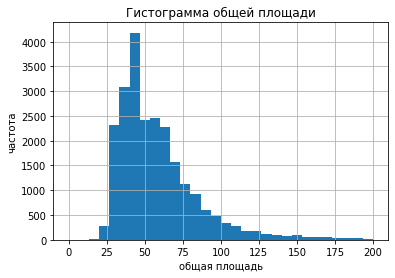

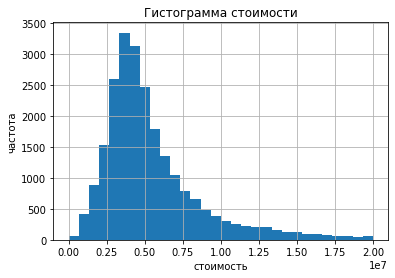

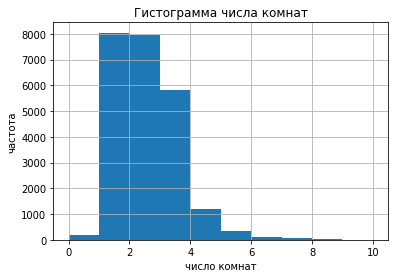

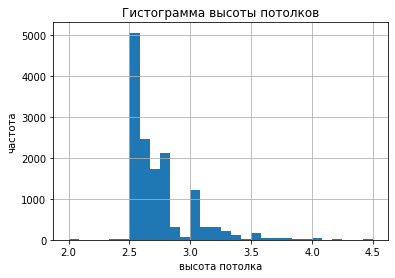

In [12]:
# проведем исследование
# построим диаграммы для площади, цены, числа комнат и высоты потолков

realty_data.hist('total_area', bins = 30, range = (0, 200))
plt.title("Гистограмма общей площади")
plt.xlabel("общая площадь")
plt.ylabel("частота")

realty_data.hist('last_price', bins = 30, range = (0, 20000000))
plt.title("Гистограмма стоимости")
plt.xlabel("стоимость")
plt.ylabel("частота")

realty_data.hist('rooms', bins = 10, range = (0, 10))
plt.title("Гистограмма числа комнат")
plt.xlabel("число комнат")
plt.ylabel("частота")

realty_data.hist('ceiling_height', bins = 30, range = (2, 4.5))
plt.title("Гистограмма высоты потолков")
plt.xlabel("высота потолка")
plt.ylabel("частота")

**Анализ графиков**

* Гистограмма общей площади - на графике видно, что наиболее распространненными значениями площади являются значения в диапазоне 25 - 75 кв. м. Самая распространенная площать: 40 - 45 кв. м. Т. е. в основном объявления с площатью менее 75 кв. м.


* Гистограмма стоимости - из графика видно, что большинство продаваемой недвиижмости находится в ценовом диапазоне: 2 500 000 - 5 000 000. Следующий диапазон по частоте встречающихся объявлений: 5 000 000 - 7 500 000.


* Гистограмма числа комнат - на графике видно, что больше всего объявлений однокомнатных и двухкомнатных квартир (приблизительно в равном колличестве). На четверть меньше объявлений с трех комнатными квартирами и совсем немного объявлений с квартирами включающими четыре и более комнаты.


* Гистограмма высоты потолков - на графике видно, что самые "распространенные" потолки высотой 2.5 метра, далее идут потолки высотой 2.6 - 2.8 метров (встречаются почти в два раза реже потолков 2.5 метров высотой), следующие по частоте идут потолки 3 метра высотой, остальные встречаются давольно редко. 

Среднее время продажи 180.89
Медианное время продажи 95.00


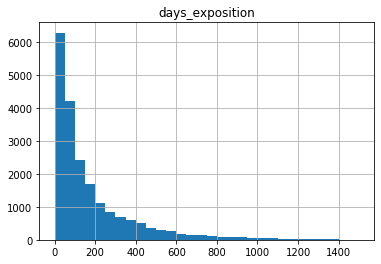

In [13]:
# изучим время продажи квартиры

realty_data.hist('days_exposition', bins = 30, range = (0, 1500)) 

print('Среднее время продажи {:.2f}'.format(realty_data['days_exposition'].mean()))
print('Медианное время продажи {:.2f}'.format(realty_data['days_exposition'].median()))

Судя по гистограмме: слишком быстрые продажи - меньше 7 дней (суде по первому пику на гистограмме), слишком долгие продажи - более 1100 дней. Обычно продажа занимает от 40 до 200.

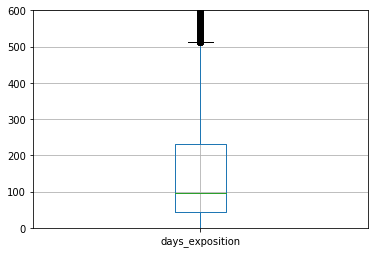

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f1c294050>]],
      dtype=object)

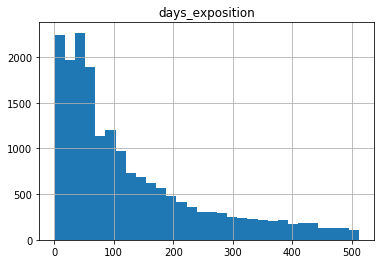

In [14]:
# с помощью диаграммы размаха определяем границу "полезных значений" и выбросов - [1:512]
plt.ylim(0, 600)
realty_data.boxplot('days_exposition')
plt.show()

good_days_exposition = realty_data.query('days_exposition > 1 and days_exposition < 512')

good_days_exposition.hist('days_exposition', bins = 30, range = (1, 512))

Судя по обновленной гистограмме: слишком быстрые продажи - меньше 1 дня, слишком долгие продажи - более 230 дней. Обычно продажа занимает от 1 до 60 дней.

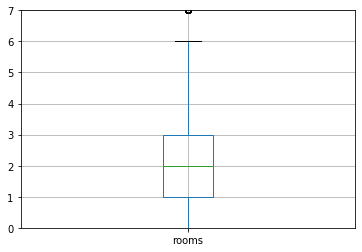

In [15]:
# изучим факторы влияфющие на стоимость квартиры

# с помощью диаграммы размаха определяем границу "полезных значений" и выбросов - [1:512]
# last_price - [12180:11900000]
# total_area - [11:115]
# rooms - [0:6]
# cityCenters_nearest - [181:26870]
plt.ylim(0, 7)
realty_data.boxplot('rooms')
plt.show()

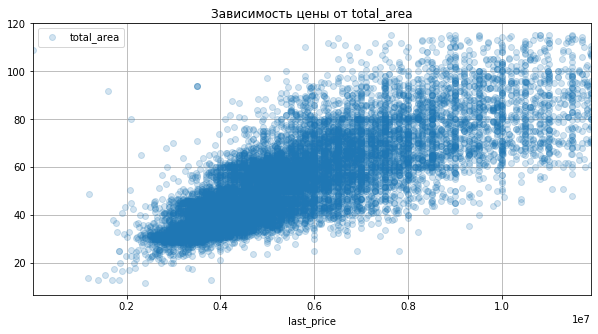

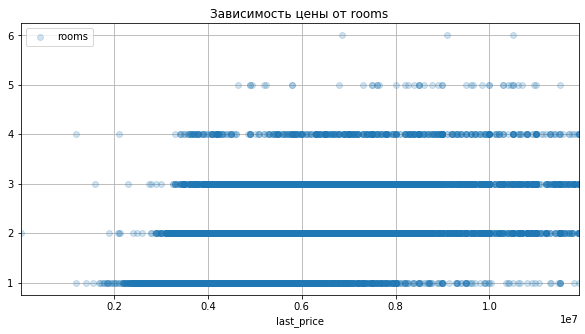

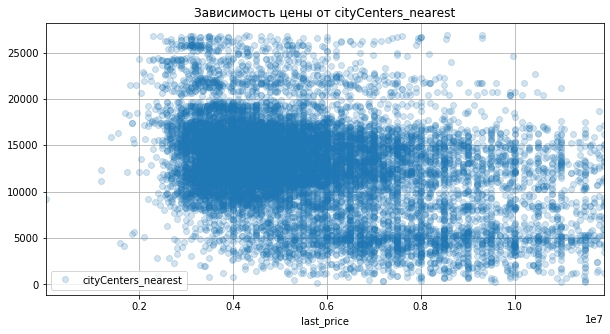

In [16]:
task_four = realty_data
task_four = task_four.query('rooms > 0 and rooms <= 6')
task_four = task_four.query('last_price >= 12180 and last_price <= 11900000')
task_four = task_four.query('total_area >= 11 and total_area <= 115')
task_four = task_four.query('cityCenters_nearest >= 181 and cityCenters_nearest <= 26870')

task_four_columns = ['total_area', 'rooms', 'cityCenters_nearest']
for column in task_four_columns:
    task_four.plot(x = 'last_price', y = column, title = ("Зависимость цены от " + column), style = 'o', alpha = 0.2, grid = True, figsize = (10, 5))

In [17]:
print('Коэффициент корреляции Пирсона, между столбцами last_price и total_area', task_four['last_price'].corr(task_four['total_area']))
print('Коэффициент корреляции Пирсона, между столбцами last_price и rooms', task_four['last_price'].corr(task_four['rooms']))
print('Коэффициент корреляции Пирсона, между столбцами last_price и cityCenters_nearest', task_four['last_price'].corr(task_four['cityCenters_nearest']))

Коэффициент корреляции Пирсона, между столбцами last_price и total_area 0.7891633370919425
Коэффициент корреляции Пирсона, между столбцами last_price и rooms 0.510527215856151
Коэффициент корреляции Пирсона, между столбцами last_price и cityCenters_nearest -0.3714145615320527


Из графика зависимосци цены от общей площади видно что чем больше площадь, тем дороже квартира, можно сказать что зависимость прямая, что вполне логично :)

Из графика зависимости цены от количества комнат видно что наиболее дорогими являются квартиры с 2 и 3 комнатами, далее идут 4-х комнатные. 1 комнатные квартиры - самые дешевые.

Что касается зависимости от расстояния до центра: есть "золотая середина", где сосредоточено большинство квартир по "приемлимой" цене, однако близкие к центру квартиры, всё таки, как правило дороже.

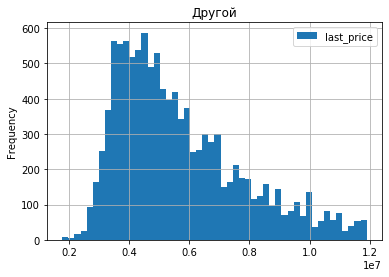

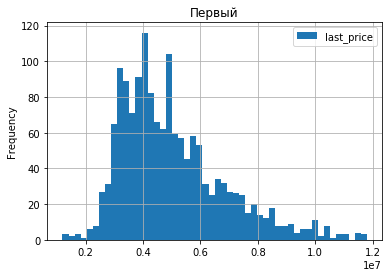

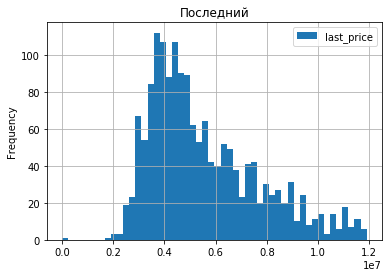

In [18]:
# зависимость цены от этажа

for name, group_data in task_four.groupby('floor_type'):
    group_data.plot(y = 'last_price', title = name, kind = 'hist', bins = 50, grid = True)

На графике для "Другой" этаж, заметно, что частота (по верхнему значению 600 против 120), намного выше, чем у "Пергово" и "Последнего" этажа, что вполне логично :)

Также график "Другой" этаж более плавный вблизи пикового значения, в отличие от двух других.

На всех этих графиках пик приходится в районе 4 000 000 рублей.

Распределение на всех графиках - нормальное.

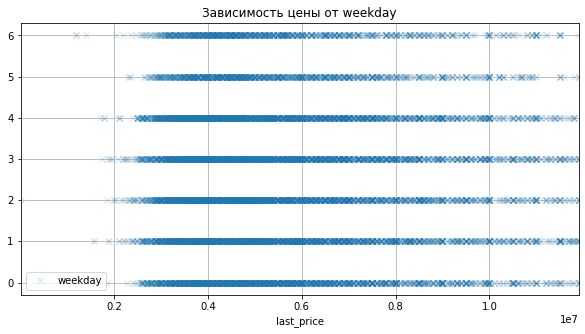

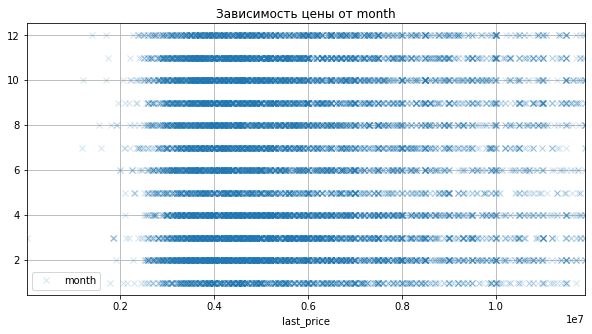

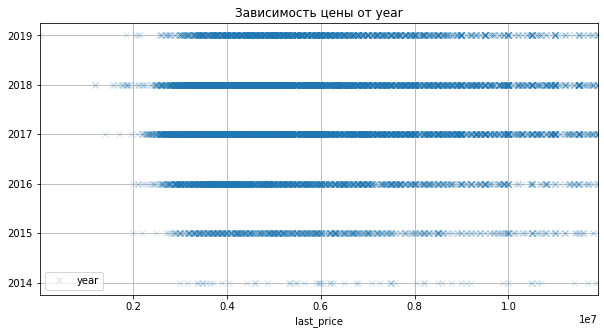

In [19]:
# зависимость цены от дня недели, месяца, года

data_columns = ['weekday', 'month', 'year']
for column in data_columns:
    task_four.plot(x = 'last_price', y = column, title = ("Зависимость цены от " + column), style = 'x', alpha = 0.2, grid = True, figsize = (10, 5))

Явной зависимости между днём недели и ценой - я не наблюдаю. Тоже самое и с зависимостью между месяцем и ценой, а вот между годом и ценой завасимость есть - больше всего (в т. ч. и более дорогих квартир, по сравнению с другими годами) покупали в 2017 - 2018 годах. В 2019 году колличество покупок сократилось по сравнению с 2017 - 2018 годами, однако их больше чем в 2014 - 2016 годах.

In [20]:
# задание 5

# выделим населенные пункты с наибольшим числом объявлений (столбец total_images брался из-за отсутствия пропусков)
locality_name_data = realty_data.pivot_table(index='locality_name', values='total_images', aggfunc = 'count')
locality_name_top10 = locality_name_data.query('total_images > 230')
good_data_name = realty_data.query('locality_name in @locality_name_top10.index')

# вычислим среднюю стоимость квадрадного метра
good_data_name_mean = good_data_name.pivot_table(index='locality_name', values='price_meter', aggfunc = 'mean')
good_data_name_mean.columns = ['price_meter_mean']
print(good_data_name_mean.sort_values(by = 'price_meter_mean', ascending = False))

# покажем максимальную и минимальную стоимость жилья в указаных населенных пунктах
good_data_name.groupby('locality_name').agg({'price_meter':['min', 'max']}).sort_values(by=('price_meter', 'max'), ascending=False).head(15)

                   price_meter_mean
locality_name                      
Санкт-Петербург       114848.565231
Пушкин                103125.373984
деревня Кудрово        92473.086957
посёлок Парголово      90175.489297
посёлок Мурино         85751.733716
посёлок Шушары         78676.904545
Колпино                75424.150888
Гатчина                68745.693811
Всеволожск             68654.007538
Выборг                 58141.489451


price_meter         
                          min      max
locality_name                         
Санкт-Петербург           111  1907500
Всеволожск              31400   640422
Пушкин                  59836   256521
посёлок Шушары          47700   147826
Гатчина                 10507   146315
деревня Кудрово         54160   142857
посёлок Мурино          50000   138580
посёлок Парголово       39205   138522
Колпино                 47957   125000
Выборг                  18750   107473

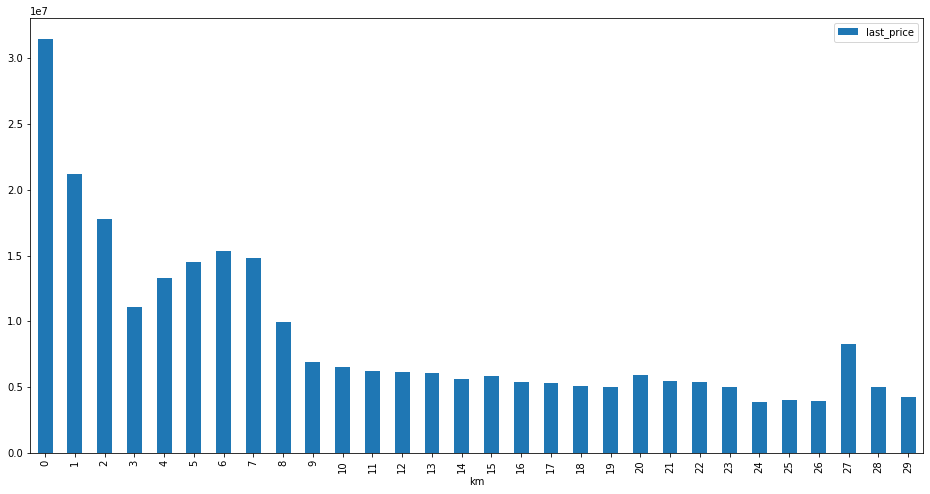

In [21]:
# задание 6
# отключим ошибку
pd.options.mode.chained_assignment = None  # default='warn'

# выберем квартиры в Санкт-Петербурге
spb = realty_data.query('locality_name == "Санкт-Петербург"')
sbp_distance = spb[['last_price', 'cityCenters_nearest']]

# для перевода в тип int заполним пропуски медианным значением
cityCenters_nearest_median = sbp_distance['cityCenters_nearest'].median()
sbp_distance['cityCenters_nearest'] = sbp_distance['cityCenters_nearest'].fillna(cityCenters_nearest_median)

# создадим столбец и переведём данные в км, округлим до целых значений
sbp_distance['km'] = sbp_distance['cityCenters_nearest'] / 1000
sbp_distance['km'] =  round(sbp_distance['km']).astype('int')

sbp_distance.groupby('km').agg({'last_price':'mean'}).sort_values(by = 'km').plot(kind = 'bar', figsize = (16, 8))

**Граница на расстоянии 7 км** была выбрана по причине того что между стоимостью на расстоянии 9 км и 7 км, разница приблизительно в два раза, поэтому, на мой взгляд данное расстояние (7 км) можно считать границей центра.

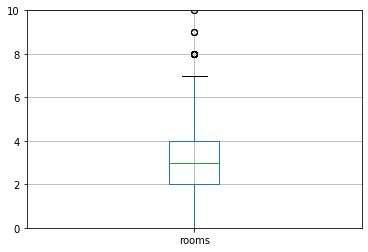

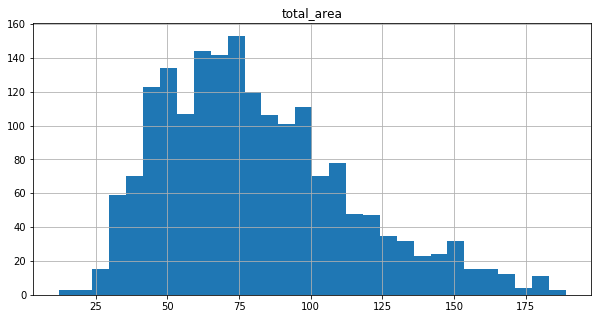

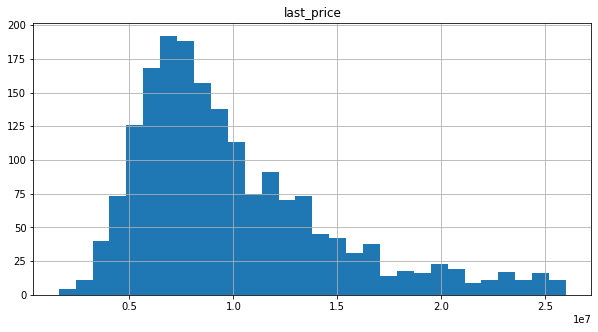

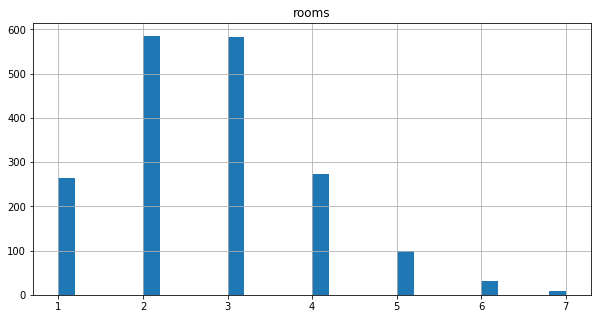

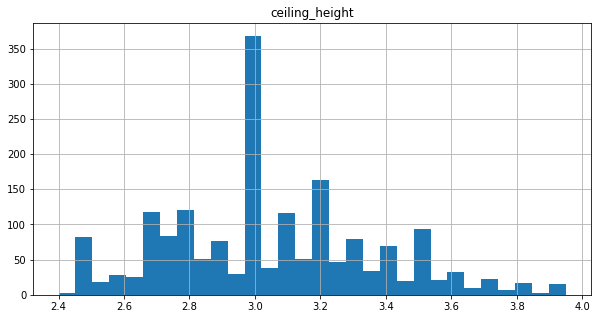

In [22]:
spb_center = spb.query('cityCenters_nearest <= 7000')

# total_area - [12:189]
# last_price - [160000:26037740]
# rooms - [0:7]
# ceiling_height - [2.4:3.95]
plt.ylim(0, 10)
spb_center.boxplot('rooms')
plt.show()

spb_center = spb_center.query('total_area >= 12 and total_area <= 189')
spb_center = spb_center.query('last_price >= 160000 and last_price <= 26037740')
spb_center = spb_center.query('rooms > 0 and rooms <= 7')
spb_center = spb_center.query('ceiling_height >= 2.4 and ceiling_height <= 3.95')

spb_center_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in spb_center_columns:
    spb_center.hist(column, bins = 30, figsize = (10, 5))

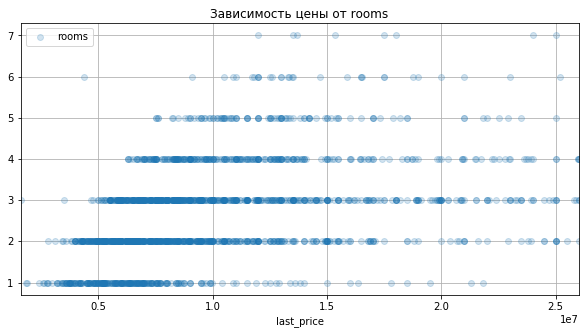

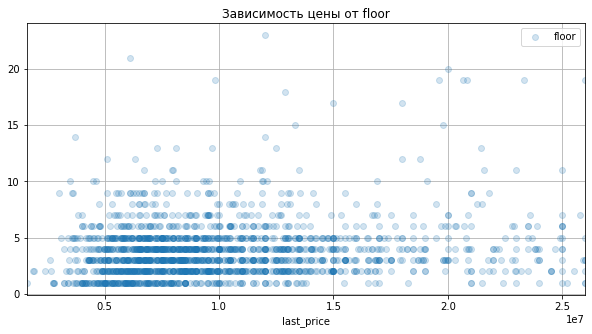

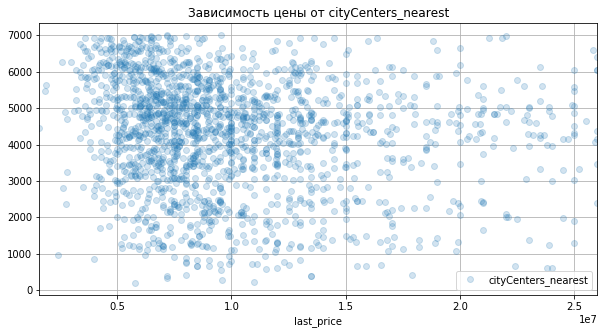

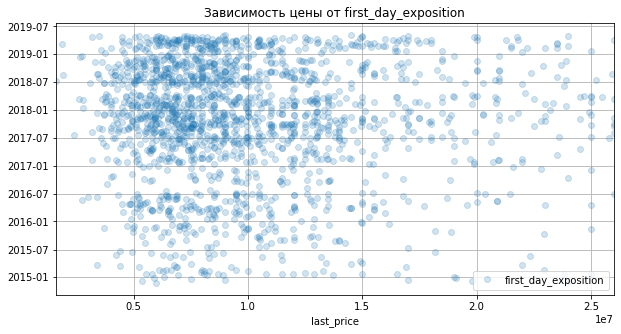

In [23]:
spb_center_columns2 = ['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition']
for column in spb_center_columns2:
    spb_center.plot(x = 'last_price', y = column, title = ("Зависимость цены от " + column), style = 'o', alpha = 0.2, grid = True, figsize = (10, 5))

В центре, наиболее дорогие 3 и 2-х комнаные квартиры. Далее идут 4-х и более комнатные квартиры, однокомнатные - самые дешевые в плане этажности (возможно не совсем рпавильно понял задание и надо было проанализировать как и в начале "первый", "последний" и "другой", но мне также интересно увидеть распределение по всем этажам :) ) - наименее предпочтителен первый этаж, от 2 до 5 - ситуация приблизительно одинаковая - востребованы в равной степени явной зависимости между стоимостью и расстоянием не наблюдаю, что касается даты размещения объявления - с 2017 по 2019 год начали активно публиковаться объявления в ценовом сегменте "ниже" середины (до этого активность была значительно меньше). Также в этот же период в сегменте "выше" середины заметно увеличение числа объявлений.

### Шаг 5. Общий вывод

Было очень интересно изучить этот датасет :)

Изначально у меня был датасет с данными сервиса Яндекс.Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет). Датасет состоял из 22 столбцов содержащих различную информацию о недвижимости, длинна датасета - 23 699 строк. Для корректной работы с датасетом были убраны пропуски, в столбцах, где удалось предположить, какие значения должны быть на пропущеных местах, так же данные были приведены в надлежащий вид (целочисленные параметры переведены из float в int, столбец с датой - в формат дата / время). В заключении предобработки датесет был провен на наличие дубликатов. 

Далее согласно поставленой задаче были добавлены следующие столбцы:

* _price_meter_ - стоимость квадратного метра
* _weekday_ - день недели публикации объявления
* _month_ - месяц публикации объявления
* _year_ - год публикации объявления
* _floor_type_ - "тип этажа", разделили этаж продаваемой недвижимости на категории "первый", "последний", "другой"
* _living_to_total_ - соотношение жилой и общей площади
* _kitchen_to_total_ - соотношение площади кухни к общей площади

В ходе анализа установлена зависимость цены от площади, как для квартир в центре, так а для любых других. Было выявлено что наиболее востребованы 2 и 3-х комнатные квартиры, как в центре, так и в остальных частях населённого пункта, самыми дешевыми - очевидно являются однокомнатные квартиры. Большинство квартир продается на "среднем удалении от центра", т. е. и не в самом центре и не на окраине, в рамках центра, стоимость не сильно зависит от удаления расстояния. Если рассматривать этаж - то наименее продаваемый - первый, для остальных этажей - явной зависимости не наблюдается. Также виден общий прирост объявлений по сравнению с 2014 - 2016 годом, однако показатели 2019 немного хуже показателей 2017 - 2018. Ещё примечательно что дорогие квартиры в центре более активно начали продавать после 2017 года.


**Основные результаты исследования:**

* из графика зависимосци цены от общей площади видно, что чем больше площадь, тем дороже квартира, можно сказать что зависимость прямая

* из графика зависимости цены от количества комнат видно, что наиболее дорогими являются квартиры с 2 и 3 комнатами, однокомнатные квартиры - самые дешевые

* что касается зависимости от расстояния до центра: есть "золотая середина" (2 500 000 - 7 500 000 рублей), где сосредоточено большинство квартир по "приемлимой" цене, однако близкие к центру квартиры, всё таки, как правило дороже

* благодаря гистограмме высоты потолков установлено, что самые "распространенные" потолки высотой 2.5 метра, далее идут потолки высотой 2.6 - 2.8 метров (встречаются почти в два раза реже потолков 2.5 метров высотой), следующие по частоте идут потолки 3 метра высотой, остальные встречаются давольно редко

* явной зависимости между днём недели / месяцев и ценой - не установлено

* а вот между годом и стоимостью завасимость есть - больше всего (в т. ч. и более дорогих квартир, по сравнению с другими годами) покупали в 2017 - 2018 годах. В 2019 году колличество покупок сократилось по сравнению с 2017 - 2018 годами, однако их больше чем в 2014 - 2016 годах

* границе центра, в ходе исследования была установлена на насстоянии 7 км от центра города